In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/surabaya-house-prices.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            7261 non-null   float64
 1   num_bedroom      7300 non-null   int64  
 2   num_bathroom     7300 non-null   int64  
 3   garage_capacity  7300 non-null   int64  
 4   land_area        7300 non-null   int64  
 5   building_area    7300 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 342.3 KB


In [2]:
df.dropna(inplace=True)

In [3]:
df.drop(df[df["num_bedroom"] == 0].index, inplace=True)
df.drop(df[df["num_bathroom"] == 0].index, inplace=True)

In [4]:
df[df["land_area"] < df["building_area"]]
# df.drop(df[df["land_area"] < df["building_area"]].index, inplace=True)

,price,num_bedroom,num_bathroom,garage_capacity,land_area,building_area
1,1.800000e+09,4,3,1,119,199
2,3.250000e+09,4,2,2,210,300
4,3.980000e+09,15,15,1,136,233
5,1.370000e+10,5,6,2,330,600
6,3.300000e+09,4,3,0,140,200
...,...,...,...,...,...,...
7292,6.000000e+09,4,3,2,283,450
7293,2.900000e+09,3,3,2,187,240
7295,7.950000e+09,4,5,2,240,350
7296,9.500000e+08,3,3,1,84,120


In [5]:
df.sort_values("land_area", ascending=False).head(10)
# df.drop(df[df["land_area"] > 5000].index, inplace=True)

,price,num_bedroom,num_bathroom,garage_capacity,land_area,building_area
3617,2.900000e+10,5,4,4,60000,100000
2047,7.500000e+09,4,4,2,37500,40000
2894,2.700000e+09,7,5,1,16500,20600
4642,2.950000e+09,4,3,1,10000,12500
2706,3.360000e+10,4,2,2,3852,900
2702,4.500000e+10,6,7,2,3852,1800
7085,5.490000e+10,6,6,4,3852,1800
302,7.510000e+08,6,3,0,3490,3490
175,7.510000e+08,6,3,0,3490,3490
5053,3.330000e+10,2,1,0,3202,1000


In [6]:
df.sort_values("building_area", ascending=False).head(10)
# df.drop(df[df["building_area"] > 8000].index, inplace=True)

,price,num_bedroom,num_bathroom,garage_capacity,land_area,building_area
3617,2.900000e+10,5,4,4,60000,100000
2047,7.500000e+09,4,4,2,37500,40000
2894,2.700000e+09,7,5,1,16500,20600
4642,2.950000e+09,4,3,1,10000,12500
2473,7.500000e+09,4,4,1,425,5500
2671,6.000000e+10,6,6,2,1950,4300
302,7.510000e+08,6,3,0,3490,3490
175,7.510000e+08,6,3,0,3490,3490
1539,3.950000e+09,4,3,3,251,3257
5932,5.280000e+10,1,1,0,2793,2793


In [7]:
df.sort_values("price", ascending=False).head(10)
# df.drop(df[df["building_area"] > 8000].index, inplace=True)

,price,num_bedroom,num_bathroom,garage_capacity,land_area,building_area
7150,1.250000e+11,5,2,10,2500,1000
4400,1.100000e+11,6,4,0,1384,426
1109,1.050000e+11,5,6,0,2000,1500
6679,1.010000e+11,4,4,0,1351,800
5148,1.000000e+11,6,6,0,2042,1800
2135,9.800000e+10,7,9,2,1996,2000
752,9.500000e+10,6,5,2,2042,1800
1108,8.500000e+10,6,7,0,1000,1350
1345,8.500000e+10,6,1,2,1000,600
7262,8.500000e+10,4,5,1,1000,1000


In [8]:
df.duplicated().sum()

np.int64(1595)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,price,num_bedroom,num_bathroom,garage_capacity,land_area,building_area
count,5.397000e+03,5397.000000,5397.000000,5397.000000,5397.000000,5397.000000
mean,4.904790e+09,3.892903,2.976468,0.942931,257.016861,288.124328
std,8.277844e+09,2.988925,2.677363,1.264678,1023.687272,1519.735829
min,3.500000e+07,1.000000,1.000000,0.000000,3.000000,0.000000
25%,1.500000e+09,3.000000,2.000000,0.000000,100.000000,113.000000
50%,2.600000e+09,3.000000,3.000000,1.000000,160.000000,180.000000
75%,4.750000e+09,4.000000,3.000000,2.000000,290.000000,300.000000
max,1.250000e+11,68.000000,68.000000,25.000000,60000.000000,100000.000000


In [11]:
df.corr()

,price,num_bedroom,num_bathroom,garage_capacity,land_area,building_area
price,1.000000,0.203610,0.239956,0.241220,0.219749,0.153340
num_bedroom,0.203610,1.000000,0.806102,0.238712,0.072940,0.077042
num_bathroom,0.239956,0.806102,1.000000,0.214700,0.073546,0.083949
garage_capacity,0.241220,0.238712,0.214700,1.000000,0.089889,0.078120
land_area,0.219749,0.072940,0.073546,0.089889,1.000000,0.971777
building_area,0.153340,0.077042,0.083949,0.078120,0.971777,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5397 entries, 0 to 7299
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5397 non-null   float64
 1   num_bedroom      5397 non-null   int64  
 2   num_bathroom     5397 non-null   int64  
 3   garage_capacity  5397 non-null   int64  
 4   land_area        5397 non-null   int64  
 5   building_area    5397 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 295.1 KB


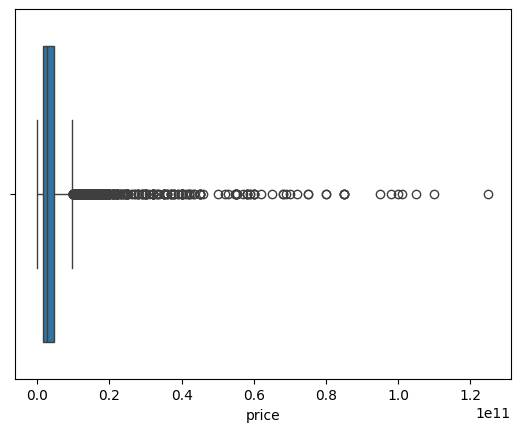

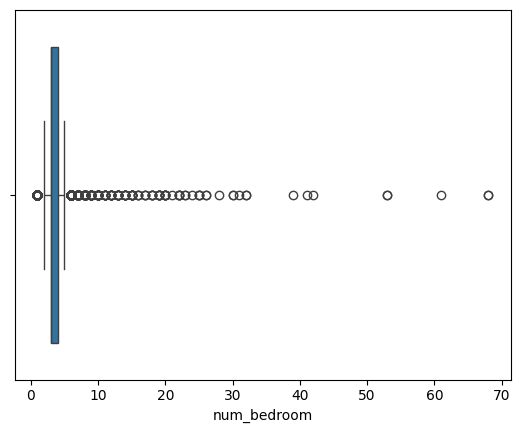

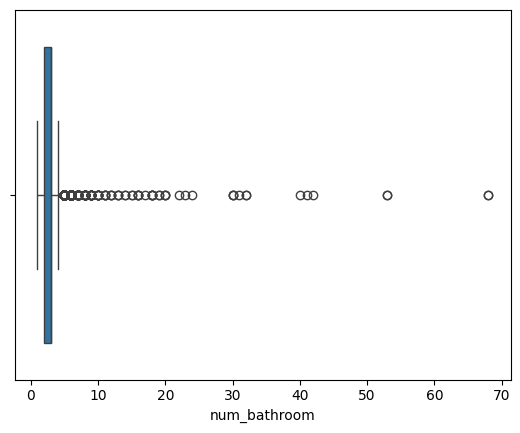

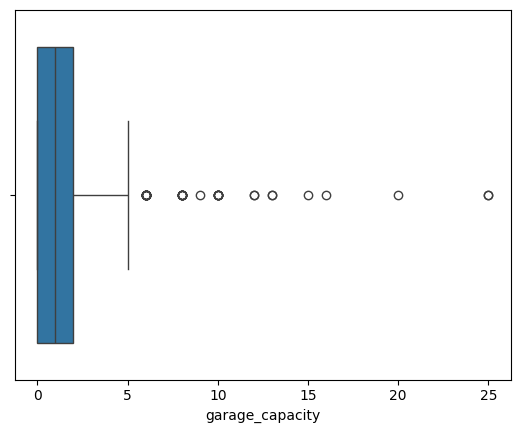

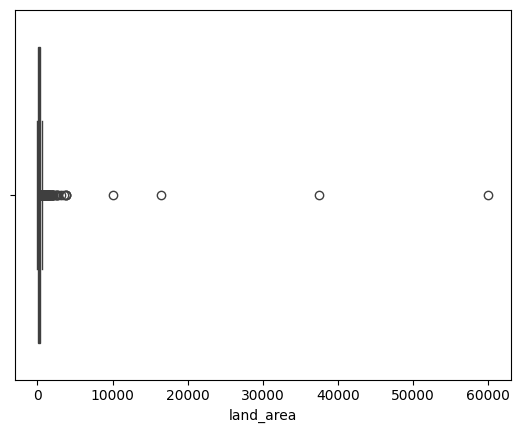

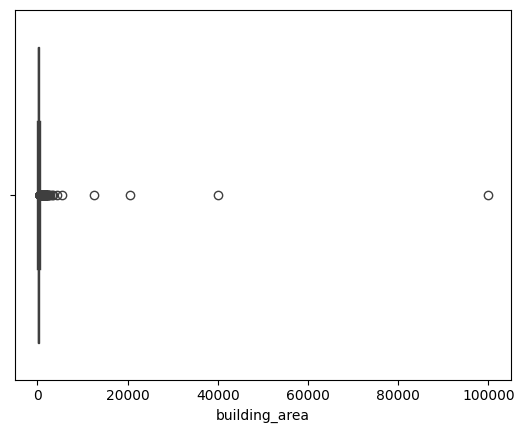

In [13]:
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.show()

In [14]:
df.to_csv("data/surabaya-house-prices-cleaned.csv", index=False)

In [15]:
from sklearn.preprocessing import StandardScaler

X = df.drop("price", axis=1)
y = df["price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=0
)

In [17]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
)


def evaluation_metric(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return [f"{mae:.5f}", f"{mse:.5f}", f"{rmse:.5f}", f"{r2:.5f}"]

In [18]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

models = {
    "rf": RandomForestRegressor(random_state=0),
    "gb": GradientBoostingRegressor(random_state=0),
    "ridge": RidgeCV(),
    "linreg": LinearRegression(),
    "lasso": LassoCV(random_state=0),
    "tree": DecisionTreeRegressor(random_state=0),
}


results = []

for model in models.values():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append(evaluation_metric(y_test, y_pred))


evaluation_df = pd.DataFrame(
    data=results,
    columns=["MAE", "MSE", "RMSE", "R-squared"],
)

evaluation_df["Method"] = [name for name in models.keys()]
evaluation_df.set_index("Method", inplace=True)

evaluation_df.sort_values("R-squared", ascending=False)

,MAE,MSE,RMSE,R-squared
Method,,,,
gb,1719395759.57389,15590988105030088704.00000,3948542529.21633,0.74482
rf,1625534713.52232,16339932098596667392.00000,4042268187.36668,0.73256
tree,1908091130.21875,29443262525962739712.00000,5426164623.92754,0.51809
linreg,3425180879.84256,48536369029907021824.00000,6966804793.44061,0.20559
ridge,3439739365.32511,48908447995066392576.00000,6993457513.63847,0.19950
lasso,3922424459.29675,56898010648003067904.00000,7543077001.33063,0.06873
